# The goal is to predict the price of used cars based on various attributes.

In [1]:

# Mount Google Drive
# ---------------------------------------------------
from google.colab import drive
drive.mount('/content/drive')

# ---------------------------------------------------
# Set folder path (make sure the folder name matches exactly)
# ---------------------------------------------------
folder_path = "/content/drive/My Drive/Regression of Used Car Prices29.11"

# ---------------------------------------------------
#  Import libraries
# ---------------------------------------------------
import pandas as pd
import os


Mounted at /content/drive


In [2]:

# Load the train and test datasets
train_file = os.path.join(folder_path, "Regression of Used Car Prices train.csv")
test_file = os.path.join(folder_path, "Regression of Used Car Prices test.csv")


In [3]:

train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

In [4]:
train

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


In [5]:
test

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Gasoline,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes
125686,314219,Audi,Q7 55 Prestige,2019,29336,Gasoline,3.0 Liter Turbo,Automatic,White,Black,None reported,NaN
125687,314220,Audi,A6 3.0T Premium Plus,2012,77634,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
125688,314221,Audi,Q7 3.0T Premium,2012,112000,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes


In [6]:
print("Train columns:", train.columns.tolist())

Train columns: ['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'price']


transmission-manual / automatic / CVT
clean_title-whether the title is clean (no major accident history)

# High-Level EDA Code

In [7]:
train.shape

(188533, 13)

In [8]:
test.shape

(125690, 12)

In [9]:
125690/188533

# At first I thought the test set looked a bit too large, since it’s almost 70% of the size of the training set.
# Normally you’d expect something like an 80/20 or 70/30 split.
# But in this kind of dataset it actually makes sense — having a bigger test set usually gives you a more stable and reliable evaluation. With more test samples,
# the score is less affected by randomness, and the overall performance reflects the real-world distribution better.

0.6666737388149555

In [10]:
# Check for duplicate rows
train.duplicated().sum()

np.int64(0)

In [11]:
test.duplicated().sum()

np.int64(0)

In [12]:
# Missing values
train.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,5083
engine,0
transmission,0
ext_col,0
int_col,0


In [13]:
test.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,3383
engine,0
transmission,0
ext_col,0
int_col,0


In [14]:
# Fill clean_title based on accident column
# If accident indicates damage --> clean_title = "No"
# If accident indicates none reported --> clean_title = "Yes"

train['clean_title'] = train['clean_title'].copy()

# Accident reported --> Not a clean title
train.loc[
    (train['clean_title'].isna()) &
    (train['accident'] == "At least 1 accident or damage reported"),
    'clean_title'
] = "No"

# No accident reported --> Clean title
train.loc[
    (train['clean_title'].isna()) &
    (train['accident'] == "None reported"),
    'clean_title'
] = "Yes"

# Check remaining NA
train['clean_title'].isna().sum()


np.int64(2438)

In [15]:
# Keeping the remaining missing values as NaN is actually the best choice here.
# Since the number of missing entries is relatively small, filling them with a guessed value (such as the mode) would introduce noise and distort the true distribution of the data.
# In other words, imputing an artificial value would be less honest than simply acknowledging that the information is missing.

# For tree-based models (such as XGBoost, LightGBM, and CatBoost), missing values are not a problem—they are treated as a meaningful category and the model can naturally learn how to split on NaNs.
# This often captures useful patterns, because the fact that a value is missing can itself carry information. Therefore, leaving NaNs as they are is both safe and potentially beneficial for model performance.

# In summary, instead of forcing an imputation that might reduce data quality, it is better to keep the missing values as a separate category and allow the model to learn from them.

In [16]:
import numpy as np

# Define all values that should be treated as missing
missing_values = ["NA", "N/A", "n/a", "na", "Null", "NULL", "null",
                  "None", "none", "", " ", "   "]

# Replace these with np.nan
train = train.replace(missing_values, np.nan)
test = test.replace(missing_values, np.nan)

# Convert object columns of whitespace-only strings to NaN
train = train.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() == "" else x)
test = test.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() == "" else x)

# Check missing values again
train.isnull().sum(), test.isnull().sum()


/tmp/ipython-input-140387088.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train = train.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() == "" else x)
/tmp/ipython-input-140387088.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test = test.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() == "" else x)


(id                 0
 brand              0
 model              0
 model_year         0
 milage             0
 fuel_type       5083
 engine             0
 transmission       0
 ext_col            0
 int_col            0
 accident        2452
 clean_title     2438
 price              0
 dtype: int64,
 id                  0
 brand               0
 model               0
 model_year          0
 milage              0
 fuel_type        3383
 engine              0
 transmission        0
 ext_col             0
 int_col             0
 accident         1632
 clean_title     14239
 dtype: int64)

In [17]:
# Column data types

train.dtypes

,0
id,int64
brand,object
model,object
model_year,int64
milage,int64
fuel_type,object
engine,object
transmission,object
ext_col,object
int_col,object


In [18]:
# model_year doesn’t need to be converted into a date.
# It’s not really a “date”—it’s just the manufacturing year of the car, so keeping it as an integer is totally fine.
# Turning it into a full datetime (like 2015-01-01) doesn’t add any useful information, because the month and day don’t matter here.

In [19]:
# Numerical features summary
numerical_cols = train.select_dtypes(include=[np.number]).columns
train[numerical_cols].describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [20]:
# Encode ALL categorical columns
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid modifying original data
train_enc = train.copy()

# Select categorical columns (object type)
cat_cols = train_enc.select_dtypes(include=['object']).columns

# Apply Label Encoding to each categorical column
le = LabelEncoder()
for col in cat_cols:
    train_enc[col] = le.fit_transform(train_enc[col].astype(str))

train_enc.head()


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,31,495,2007,213000,2,116,38,312,71,1,1,4200
1,1,28,930,2002,143250,2,366,38,263,10,0,1,4999
2,2,9,1575,2002,136731,1,640,38,38,71,1,1,13900
3,3,16,758,2017,19500,2,863,49,29,14,1,1,45000
4,4,36,1077,2021,7388,2,259,23,29,10,1,1,97500


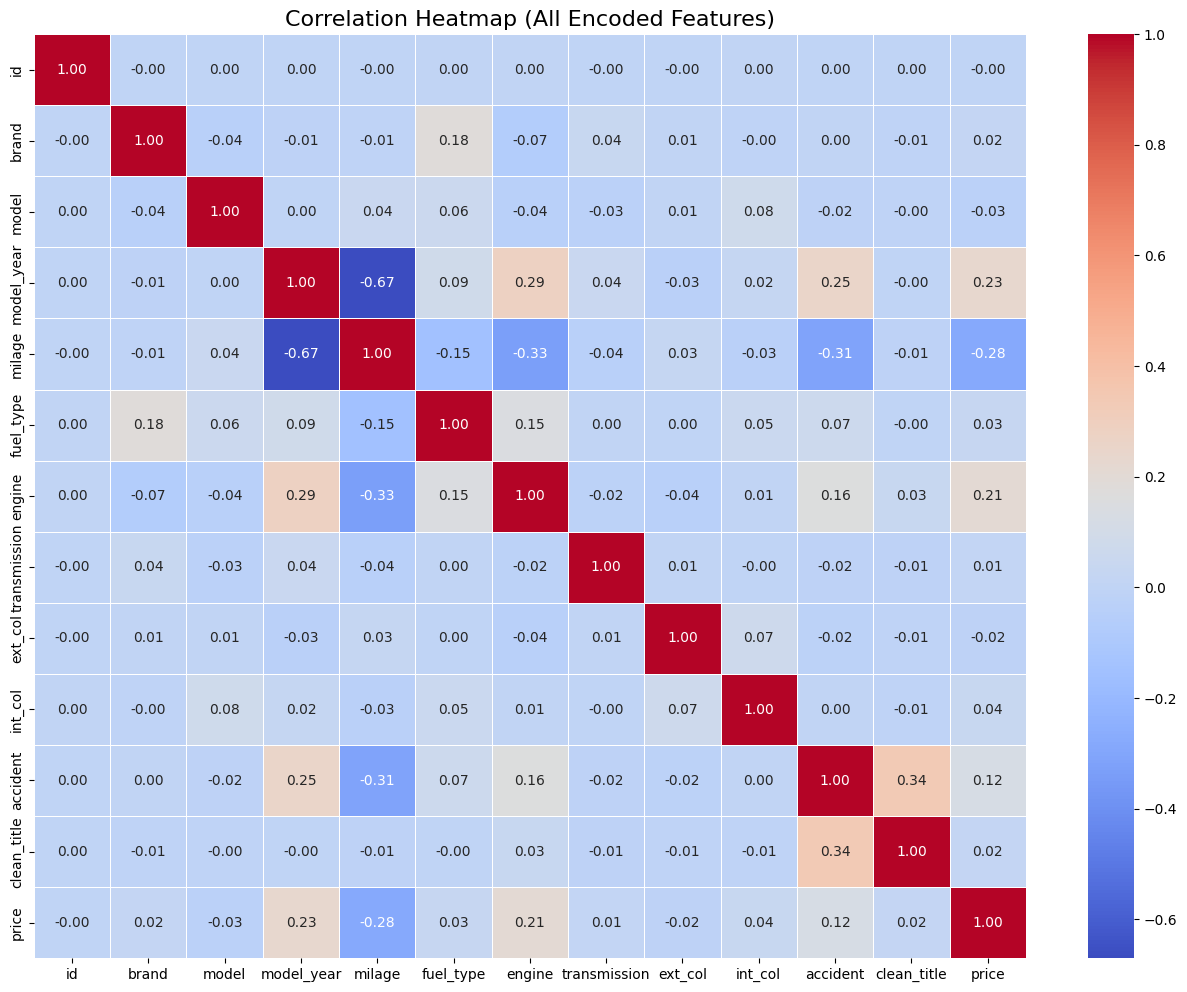

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute full correlation matrix
corr_matrix = train_enc.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f",
            cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap (All Encoded Features)", fontsize=16)
plt.show()



In [22]:
# Compute correlation of each feature with target
target_corr = corr_matrix['price'].sort_values(ascending=False)

print("Correlation of Each Feature with Target (price):")
print(target_corr)


Correlation of Each Feature with Target (price):
price           1.000000
model_year      0.231795
engine          0.208285
accident        0.123034
int_col         0.035174
fuel_type       0.034321
brand           0.017657
clean_title     0.016078
transmission    0.014560
id             -0.000877
ext_col        -0.017342
model          -0.029865
milage         -0.283067
Name: price, dtype: float64


In [23]:
# VIF Analysis (Variance Inflation Factor),feature vs all other features

import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Make a copy to avoid modifying the original
vif_df = train_enc.copy()

# Remove target column
vif_features = vif_df.drop(columns=['price'])

# Prepare dataframe to store VIF results
vif_data = pd.DataFrame()
vif_data["feature"] = vif_features.columns

# Calculate VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(vif_features.values, i)
    for i in range(vif_features.shape[1])
]

# Sort by highest VIF
vif_result = vif_data.sort_values(by="VIF", ascending=False)

vif_result


,feature,VIF
3,model_year,86.973145
11,clean_title,62.041861
5,fuel_type,10.336242
6,engine,6.759966
7,transmission,6.238053
10,accident,5.472913
0,id,3.999989
2,model,3.827569
4,milage,3.402299
1,brand,3.278986


ome features are highly correlated and a few have very high VIF, like model_year and clean_title. This means they contain overlapping information. Normally, that would be a problem for linear models, but tree-based models don’t care about multicollinearity—they handle redundant features just fine. So there’s no need to drop them. The only thing worth removing is id, since it has no predictive value.

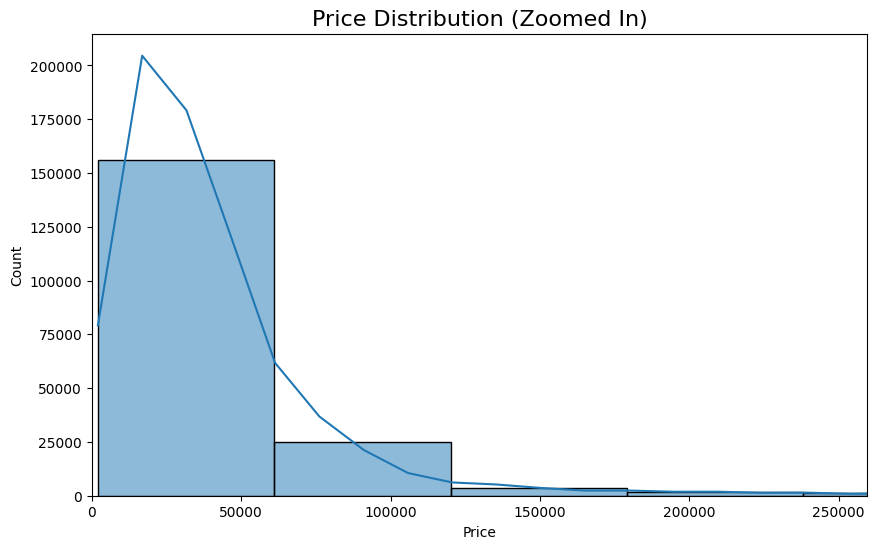

In [24]:
# Price Distribution + Skewness Check

import matplotlib.pyplot as plt
import seaborn as sns

# Limit x-axis to remove extreme outliers
plt.figure(figsize=(10, 6))
sns.histplot(train['price'], kde=True, bins=50)
plt.title("Price Distribution (Zoomed In)", fontsize=16)
plt.xlabel("Price")
plt.ylabel("Count")
plt.xlim(0, train['price'].quantile(0.99))  # show up to 99th percentile
plt.show()

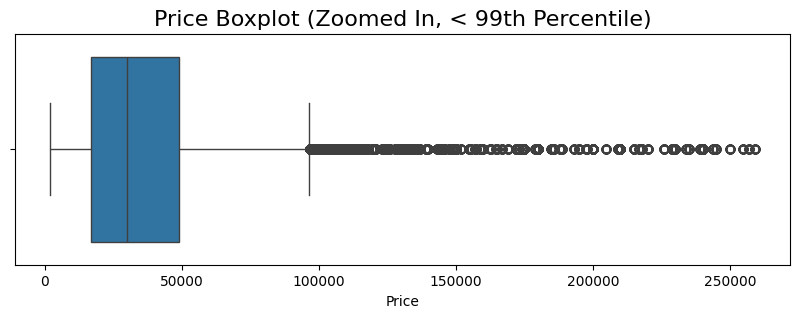

In [25]:
# Zoomed-in Boxplot (remove extreme outliers in visualization only)
upper_limit = train['price'].quantile(0.99)

plt.figure(figsize=(10, 3))
sns.boxplot(x=train[train['price'] < upper_limit]['price'])
plt.title("Price Boxplot (Zoomed In, < 99th Percentile)", fontsize=16)
plt.xlabel("Price")
plt.show()

In [26]:

# Skewness
skew_value = train['price'].skew()
print("Skewness of price:", skew_value)

Skewness of price: 20.268452710951134


The price distribution is heavily right-skewed because a few luxury or exotic
cars cost far more than the rest of the dataset. This is normal in used-car
data. Even though the skewness is very high, we don’t need to apply a log
transform because tree-based models are not sensitive to skewed targets.
ps although later approved that remove extreme values do improve performance of predicting


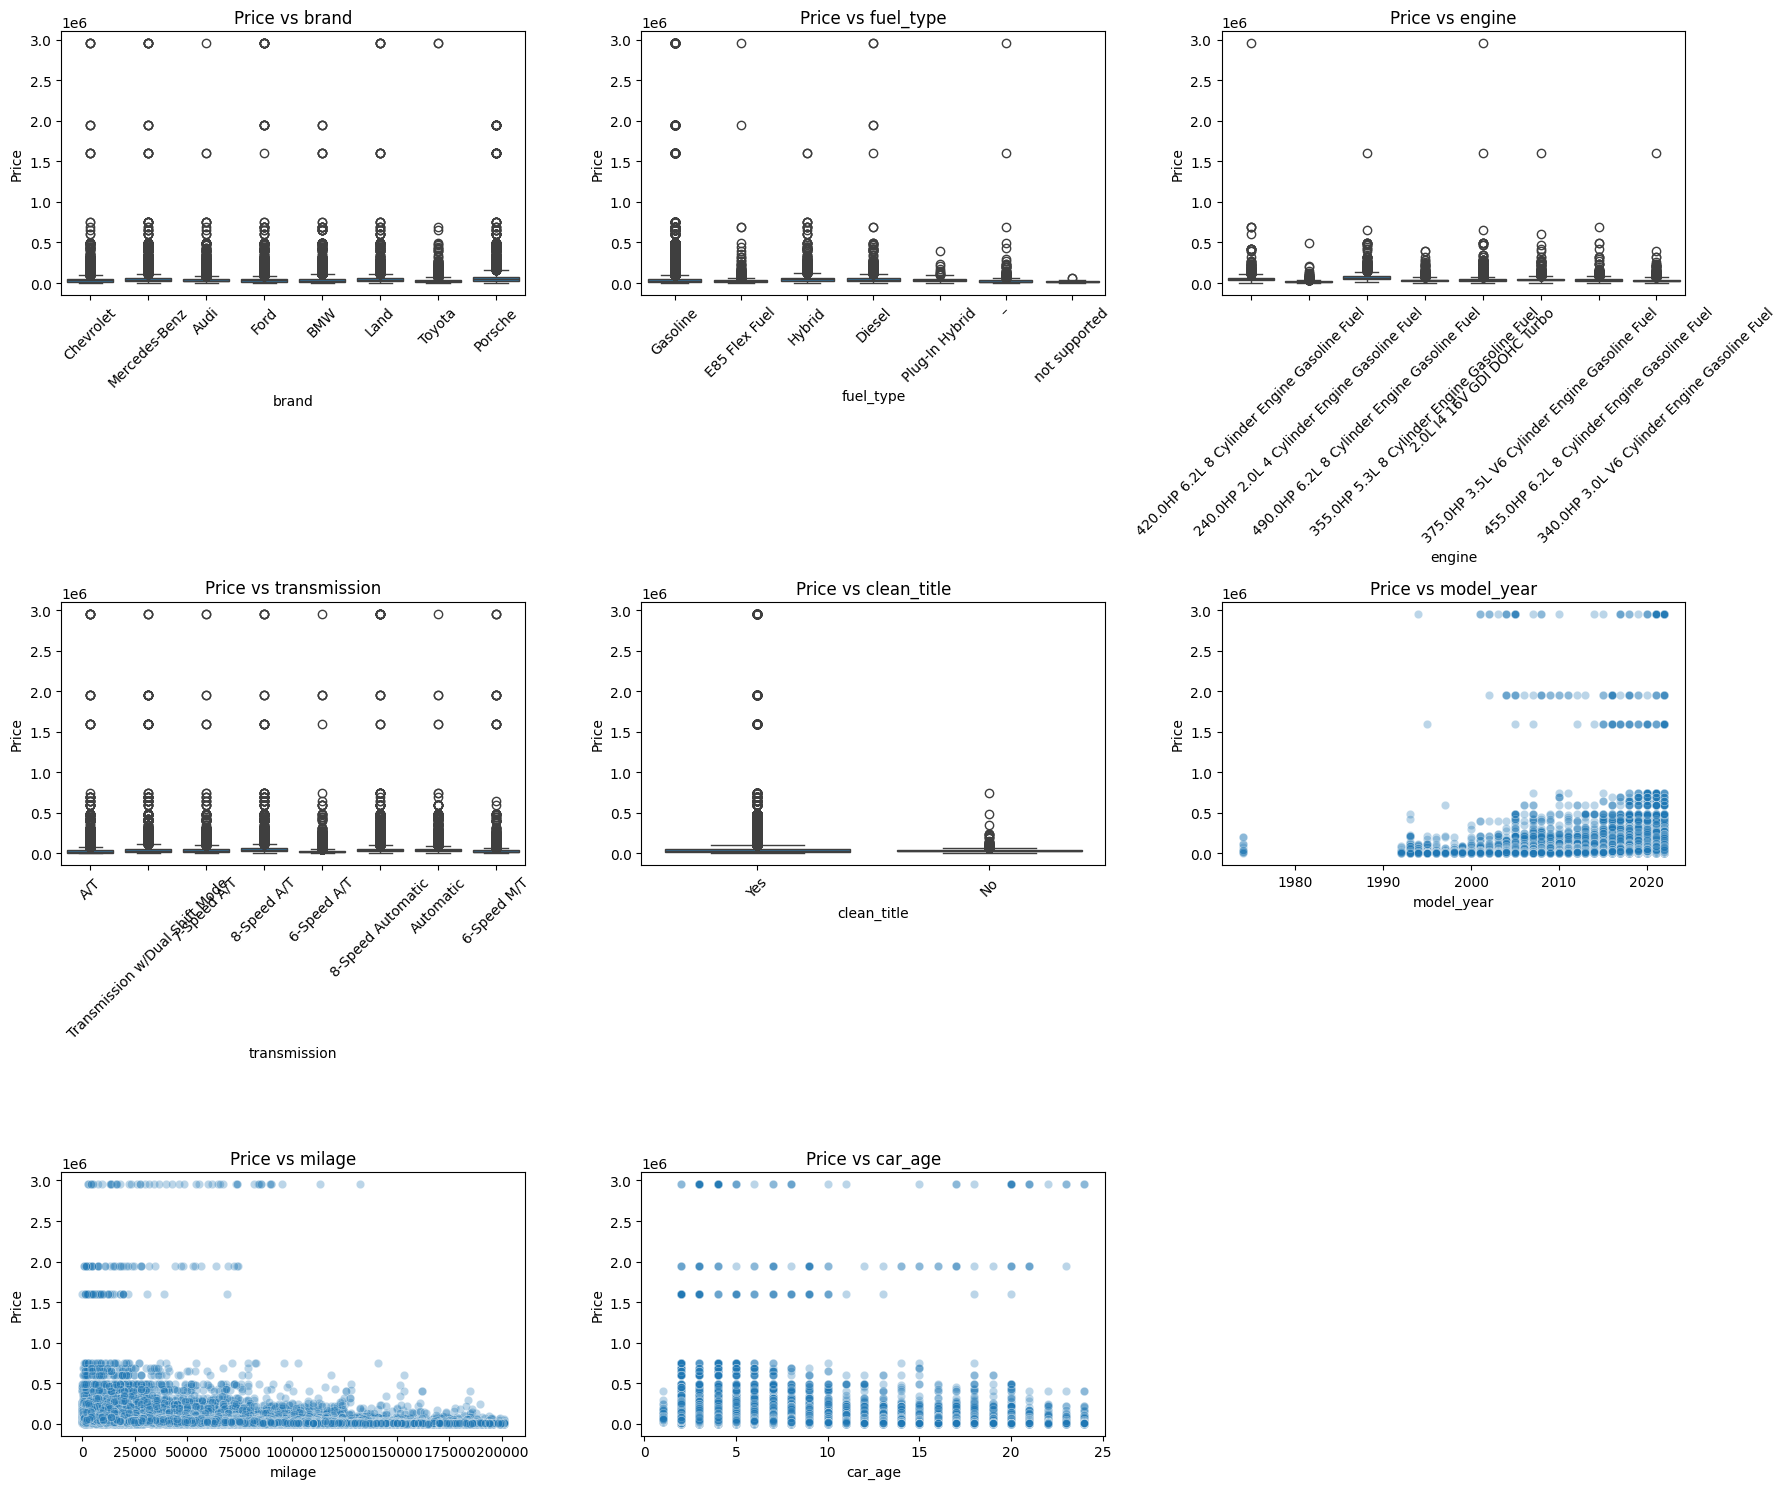

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Choose features you want to plot
features = [
    "brand", "fuel_type", "engine",
    "transmission", "clean_title",
    "model_year", "milage", "car_age"
]

# Ensure 'car_age' is present for plotting
# This guards against cases where preceding cells might not have been run or train was reset
if 'car_age' not in train.columns:
    train['car_age'] = 2025 - train['model_year']
    # Avoid division by zero, though not directly used here, good practice
    train['car_age'] = train['car_age'].replace(0, 1)

# Set the grid size (3x3)
rows = 3
cols = 3

plt.figure(figsize=(18, 15))

for i, feature in enumerate(features):
    plt.subplot(rows, cols, i + 1)

    # Categorical features → boxplot
    if train[feature].dtype == 'object':
        top_vals = train[feature].value_counts().head(8).index
        sns.boxplot(data=train[train[feature].isin(top_vals)], x=feature, y='price')
        plt.xticks(rotation=45)
        plt.title(f"Price vs {feature}")

    # Numerical features → scatter or line
    else:
        upper_limit = train[feature].quantile(0.99)
        sns.scatterplot(
            data=train[train[feature] < upper_limit],
            x=feature, y='price', alpha=0.3
        )
        plt.title(f"Price vs {feature}")

    plt.xlabel(feature)
    plt.ylabel("Price")

plt.tight_layout()
plt.show()

In [28]:
# Compute median and mean price per brand
brand_stats = train.groupby('brand')['price'].agg(['median', 'mean'])

# Sort by median (descending)
brand_stats = brand_stats.sort_values(by='median', ascending=False)

brand_stats.head(15)


,median,mean
brand,,
Bugatti,220000.0,169600.000000
Lamborghini,102000.0,159176.012361
McLaren,87500.0,123261.238683
Rivian,78000.0,81089.154237
Rolls-Royce,77500.0,135488.650624
Ferrari,75500.0,116751.005571
Bentley,73600.0,129272.933333
Aston,67650.0,112364.588235
Lucid,56000.0,63310.362319


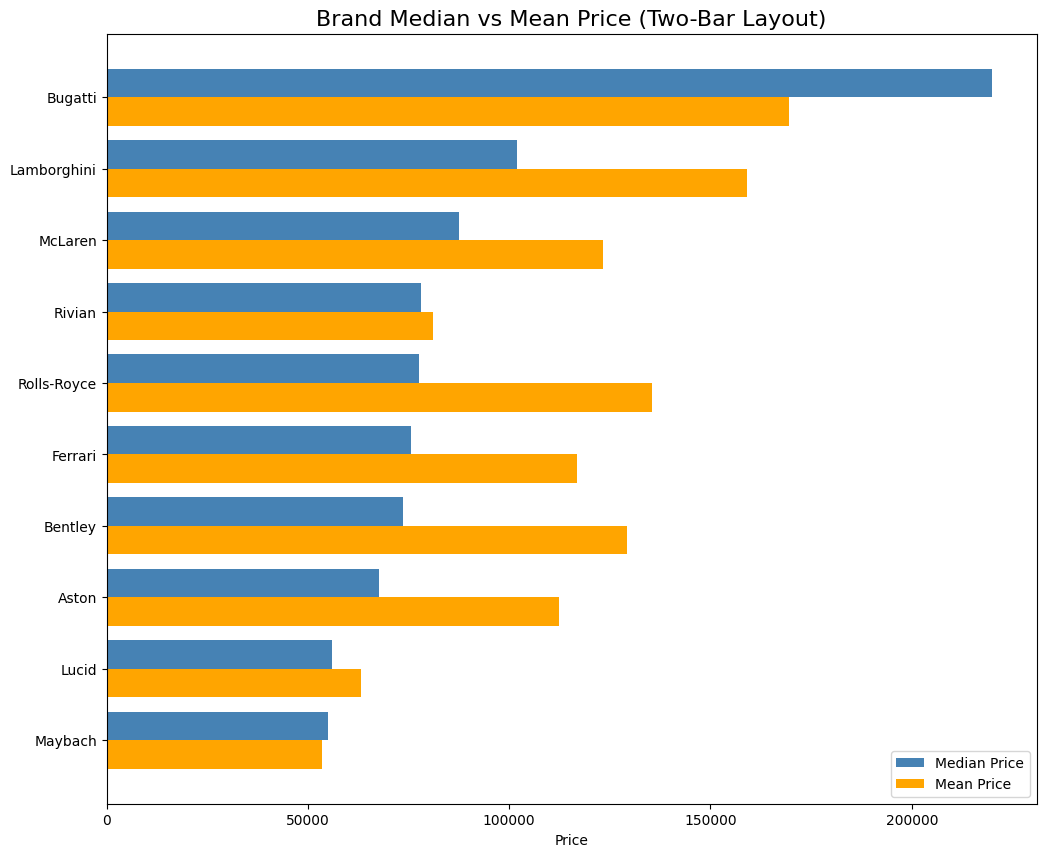

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute stats
brand_stats = train.groupby('brand')['price'].agg(['median', 'mean'])
brand_stats = brand_stats.sort_values(by='median', ascending=False)

top_n = 10
top_brands = brand_stats.head(top_n)

plt.figure(figsize=(12, 10))

y_positions = np.arange(len(top_brands)) * 2  # double spacing for “two bars per brand”

# Plot median (upper bar)
plt.barh(y_positions,
         top_brands['median'],
         color='steelblue',
         height=0.8,
         label='Median Price')

# Plot mean (lower bar)
plt.barh(y_positions + 0.8,
         top_brands['mean'],
         color='orange',
         height=0.8,
         label='Mean Price')

# Set y-axis labels in the middle of the two bars
plt.yticks(y_positions + 0.4, top_brands.index)

plt.xlabel("Price")
plt.title("Brand Median vs Mean Price (Two-Bar Layout)", fontsize=16)
plt.legend()

plt.gca().invert_yaxis()  # Highest on top
plt.show()



In [ ]:
# • Brand, model_year (car_age), and mileage are the strongest drivers of resale price.
# • Luxury brands retain value significantly better than mass-market brands.
# • Clean title adds a large price premium, while reported damage suppresses price.
# • Engine and fuel_type influence price mainly in the high-end market.
# • Transmission has minimal business impact on price differences.

# Feature Engineering Code

In [30]:
train

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,car_age
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,18
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,23
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,23
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,8
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500,8
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000,7
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900,4
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,Yes,84900,3


In [31]:
# Drop unnecessary columns
cols_to_drop = ["ext_col", "int_col", "accident"]
train = train.drop(columns=cols_to_drop)
test = test.drop(columns=cols_to_drop)

In [32]:
# Create car_age
train['car_age'] = 2025 - train['model_year']
test['car_age'] = 2025 - test['model_year']

# Avoid division by zero
train['car_age'] = train['car_age'].replace(0, 1)
test['car_age'] = test['car_age'].replace(0, 1)


In [33]:
# Create mileage_per_year
train['mileage_per_year'] = train['milage'] / train['car_age']
test['mileage_per_year'] = test['milage'] / test['car_age']

In [34]:
# Target Mean Encoding: brand_price_mean
brand_mean_price = train.groupby('brand')['price'].mean()

train['brand_price_mean'] = train['brand'].map(brand_mean_price)

global_price_mean = train['price'].mean()
test['brand_price_mean'] = test['brand'].map(brand_mean_price).fillna(global_price_mean)


Different brands clearly sit in different price levels (Toyota vs BMW vs Porsche).
brand_price_mean captures the typical resale value of each brand by using the average price per brand.
This turns “brand” from a plain category into a numeric feature that directly reflects brand value

In [35]:
# Brand= Model
train['brand_model'] = train['brand'] + "_" + train['model']
test['brand_model'] = test['brand'] + "_" + test['model']

# Target Mean Encoding
bm_mean = train.groupby('brand_model')['price'].mean()

train['brand_model_mean'] = train['brand_model'].map(bm_mean)
test['brand_model_mean'] = test['brand_model'].map(bm_mean).fillna(train['price'].mean())


Price is not only about the brand, but also the specific model (e.g. BMW M5 vs BMW 320i).
The brand_model combo feature lets the model learn pricing patterns for each exact variant,
and brand_model_mean encodes how expensive that brand–model pair usually is.
This helps the model distinguish cheap trims from high-end or performance versions within the same brand.

In [36]:
train

,id,brand,model,model_year,milage,fuel_type,engine,transmission,clean_title,price,car_age,mileage_per_year,brand_price_mean,brand_model,brand_model_mean
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yes,4200,18,11833.333333,17162.015977,MINI_Cooper S Base,12778.315972
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Yes,4999,23,6228.260870,30712.595130,Lincoln_LS V8,11972.785714
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Yes,13900,23,5944.826087,41836.755127,Chevrolet_Silverado 2500 LT,24054.754098
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Yes,45000,8,2437.500000,53556.327141,Genesis_G90 5.0 Ultimate,48915.842105
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Yes,97500,4,1847.000000,51244.399541,Mercedes-Benz_Metris Base,64855.673077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Yes,27500,8,6125.000000,45659.094780,Cadillac_Escalade ESV Platinum,51072.630631
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Yes,30000,7,4085.714286,51244.399541,Mercedes-Benz_AMG C 43 AMG C 43 4MATIC,56035.168224
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,Yes,86900,4,3412.500000,51244.399541,Mercedes-Benz_AMG GLC 63 Base 4MATIC,64000.701754
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Yes,84900,3,4631.666667,41004.856985,Audi_S5 3.0T Prestige,37505.533835


In [37]:
# Age grouping based on car_age
def age_group(age):
    if age <= 2:
        return "new"
    elif age <= 7:
        return "mid_age"
    elif age <= 15:
        return "old"
    else:
        return "very_old"

train['age_group'] = train['car_age'].apply(age_group)
test['age_group'] = test['car_age'].apply(age_group)


from sklearn.preprocessing import LabelEncoder

# Ensure label_encoders is globally accessible and initialize if not already
global label_encoders
if 'label_encoders' not in globals():
    label_encoders = {}

le = LabelEncoder()
train['age_group'] = le.fit_transform(train['age_group'])
test['age_group'] = le.transform(test['age_group'])
label_encoders['age_group'] = le # Store the encoder for age_group

Car depreciation is not linear – new cars lose value fast, mid-age cars are more stable, and very old cars sit in a low price band.
age_group turns continuous car_age into business-friendly segments (new, mid, old, very_old),
so the model can easily pick up these age buckets instead of treating every single year separately.

In [38]:
train

,id,brand,model,model_year,milage,fuel_type,engine,transmission,clean_title,price,car_age,mileage_per_year,brand_price_mean,brand_model,brand_model_mean,age_group
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yes,4200,18,11833.333333,17162.015977,MINI_Cooper S Base,12778.315972,3
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Yes,4999,23,6228.260870,30712.595130,Lincoln_LS V8,11972.785714,3
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Yes,13900,23,5944.826087,41836.755127,Chevrolet_Silverado 2500 LT,24054.754098,3
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Yes,45000,8,2437.500000,53556.327141,Genesis_G90 5.0 Ultimate,48915.842105,2
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Yes,97500,4,1847.000000,51244.399541,Mercedes-Benz_Metris Base,64855.673077,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Yes,27500,8,6125.000000,45659.094780,Cadillac_Escalade ESV Platinum,51072.630631,2
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Yes,30000,7,4085.714286,51244.399541,Mercedes-Benz_AMG C 43 AMG C 43 4MATIC,56035.168224,0
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,Yes,86900,4,3412.500000,51244.399541,Mercedes-Benz_AMG GLC 63 Base 4MATIC,64000.701754,0
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Yes,84900,3,4631.666667,41004.856985,Audi_S5 3.0T Prestige,37505.533835,0


#Ttrain/validation split

In [39]:
from sklearn.model_selection import train_test_split

# Define target and features
# Drop 'id' and 'brand_model' as they are either non-predictive or redundant after creating 'brand_model_mean'
X = train.drop(columns=['price', 'id', 'brand_model'])   # all features except target and removed columns
y = train['price']                                       # target variable

# Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)


Train shape: (150826, 13)
Validation shape: (37707, 13)


# Baseline model

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import numpy as np


In [41]:
# Helper function to evaluate models
def evaluate(model, X_train, y_train, X_val, y_val):
    # Predict
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)

    # Metrics
    rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))
    rmse_val = np.sqrt(mean_squared_error(y_val, val_pred))

    r2_train = r2_score(y_train, train_pred)
    r2_val = r2_score(y_val, val_pred)

    print("Train RMSE:", rmse_train)
    print("Val RMSE:", rmse_val)
    print("Train R2:", r2_train)
    print("Val R2:", r2_val)
    print("-" * 40)


In [42]:
# Check missing values in X_train and X_val
print("=" * 60)
print("Missing Values Check")
print("=" * 60)

# Check for NaN values
train_nan_count = X_train.isnull().sum().sum()
val_nan_count = X_val.isnull().sum().sum()

print(f"\nTotal NaN in X_train: {train_nan_count}")
print(f"Total NaN in X_val: {val_nan_count}")

# Check for inf values in numeric columns
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    train_inf_count = np.isinf(X_train[numeric_cols]).sum().sum()
    val_inf_count = np.isinf(X_val[numeric_cols]).sum().sum()
    print(f"\nTotal Inf in X_train (numeric): {train_inf_count}")
    print(f"Total Inf in X_val (numeric): {val_inf_count}")
else:
    train_inf_count = 0
    val_inf_count = 0

# Detailed missing values per column
print("\nMissing values per column in X_train:")
missing_per_col = X_train.isnull().sum()
missing_per_col = missing_per_col[missing_per_col > 0]
if len(missing_per_col) > 0:
    print(missing_per_col)
    print(f"\nPercentage of missing values: {(missing_per_col / len(X_train) * 100).round(2)}%")
else:
    print("No missing values found!")

# Check data types
print("\nData types in X_train:")
print(X_train.dtypes)

print("\n" + "=" * 60)

# Decision: Only process if there are inf values
if train_inf_count > 0 or val_inf_count > 0:
    print("\n⚠️  Found Inf values - will replace with NaN")
    need_processing = True
elif train_nan_count > 0 or val_nan_count > 0:
    print("\n✓ Found NaN values - XGBoost can handle them, but Random Forest/Gradient Boosting need filling")
    need_processing = True
else:
    print("\n✓ No missing or inf values found - data is clean!")
    need_processing = False

Missing Values Check

Total NaN in X_train: 6016
Total NaN in X_val: 1505

Total Inf in X_train (numeric): 0
Total Inf in X_val (numeric): 0

Missing values per column in X_train:
fuel_type      4060
clean_title    1956
dtype: int64

Percentage of missing values: fuel_type      2.69
clean_title    1.30
dtype: float64%

Data types in X_train:
brand                object
model                object
model_year            int64
milage                int64
fuel_type            object
engine               object
transmission         object
clean_title          object
car_age               int64
mileage_per_year    float64
brand_price_mean    float64
brand_model_mean    float64
age_group             int64
dtype: object


✓ Found NaN values - XGBoost can handle them, but Random Forest/Gradient Boosting need filling


In [56]:
# Prepare data for different models
# XGBoost can handle NaN, but Random Forest and Gradient Boosting need filled values

# For XGBoost: Keep NaN (can handle it)
X_train_xgb = X_train.copy()
X_val_xgb = X_val.copy()

# For Random Forest and Gradient Boosting: Fill NaN with -1
X_train_rf = X_train.fillna(-1)
X_val_rf = X_val.fillna(-1)

print("Data preparation completed:")
print(f"XGBoost - NaN count in X_train: {X_train_xgb.isnull().sum().sum()}")
print(f"XGBoost - NaN count in X_val: {X_val_xgb.isnull().sum().sum()}")
print(f"RF/GB - NaN count in X_train: {X_train_rf.isnull().sum().sum()}")
print(f"RF/GB - NaN count in X_val: {X_val_rf.isnull().sum().sum()}")

Data preparation completed:
XGBoost - NaN count in X_train: 0
XGBoost - NaN count in X_val: 0
RF/GB - NaN count in X_train: 0
RF/GB - NaN count in X_val: 0


# Random Forest

In [47]:
# # Remove rows where brand is 'Mercedes-Benz'
# X_train = X_train[X_train['brand'] != 'Mercedes-Benz']
# X_val = X_val[X_val['brand'] != 'Mercedes-Benz']

# # Also remove corresponding y values
# y_train = y_train[X_train.index]
# y_val = y_val[X_val.index]

# print("Removed Mercedes-Benz rows")

In [48]:
X_train['brand'].unique()

array(['Mercedes-Benz', 'Nissan', 'Ford', 'Hyundai', 'Dodge', 'Lexus',
       'BMW', 'INFINITI', 'Porsche', 'Chevrolet', 'Land', 'Toyota', 'RAM',
       'Volkswagen', 'Lincoln', 'GMC', 'Alfa', 'Honda', 'Jeep', 'Subaru',
       'Lamborghini', 'Mitsubishi', 'Audi', 'Tesla', 'Acura', 'Kia',
       'Cadillac', 'Chrysler', 'Buick', 'Saturn', 'Rolls-Royce', 'Rivian',
       'Jaguar', 'Volvo', 'Mazda', 'Hummer', 'Genesis', 'Ferrari',
       'Maserati', 'Pontiac', 'Scion', 'Aston', 'MINI', 'Bentley',
       'McLaren', 'Lotus', 'Lucid', 'FIAT', 'Suzuki', 'Mercury', 'smart',
       'Plymouth', 'Maybach', 'Polestar', 'Saab', 'Karma', 'Bugatti'],
      dtype=object)

In [49]:
from sklearn.ensemble import RandomForestRegressor
import time
from sklearn.preprocessing import LabelEncoder

print("=" * 60)
print("Random Forest Model")
print("=" * 60)

# Re-create X_train_rf and X_val_rf from the already filtered X_train and X_val
# Then fill NaNs with -1 and encode categorical features
X_train_rf_processed = X_train.copy()
X_val_rf_processed = X_val.copy()

# Identify categorical columns
cat_cols = X_train_rf_processed.select_dtypes(include=['object']).columns

# Apply Label Encoding to each categorical column
le = LabelEncoder()
for col in cat_cols:
    # Fit on training data and transform both train and val
    X_train_rf_processed[col] = le.fit_transform(X_train_rf_processed[col].astype(str))
    X_val_rf_processed[col] = le.transform(X_val_rf_processed[col].astype(str))

# Fill remaining NaN values (if any, after encoding) with -1
# Note: LabelEncoder handles NaN by converting it to a string 'nan' if present,
# so the fillna(-1) might be less critical for these columns now but good for consistency.
X_train_rf_processed = X_train_rf_processed.fillna(-1)
X_val_rf_processed = X_val_rf_processed.fillna(-1)

# Train model
start_time = time.time()

rf_model = RandomForestRegressor(
    n_estimators=200,          # Number of trees
    max_depth=20,              # Maximum depth
    min_samples_split=10,       # Minimum samples to split
    min_samples_leaf=5,        # Minimum samples in leaf
    max_features='sqrt',       # Features to consider for split
    random_state=42,
    n_jobs=-1,                 # Use all CPU cores
    verbose=1
)

# Use the processed dataframes for training and evaluation
rf_model.fit(X_train_rf_processed, y_train)

train_time = time.time() - start_time
print(f"\nTraining time: {train_time:.2f} seconds")

# Evaluate
print("\nRandom Forest Results:")
evaluate(rf_model, X_train_rf_processed, y_train, X_val_rf_processed, y_val)

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train_rf_processed.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance.head(10))

Random Forest Model


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   49.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.



Training time: 49.92 seconds

Random Forest Results:


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    7.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    7.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s


Train RMSE: 64629.16873138538
Val RMSE: 67881.26109796946
Train R2: 0.3448285297118924
Val R2: 0.17141646298424706
----------------------------------------

Top 10 Important Features:
             feature  importance
3             milage    0.207420
11  brand_model_mean    0.194279
9   mileage_per_year    0.148925
5             engine    0.089826
8            car_age    0.072890
2         model_year    0.064652
10  brand_price_mean    0.055394
1              model    0.054517
6       transmission    0.043798
12         age_group    0.036873


[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    1.7s finished


In [58]:
# Remove extreme outliers in price and mileage
# Remove top 1% and bottom 1% of prices
price_lower = y_train.quantile(0.01)
price_upper = y_train.quantile(0.99)

# Remove extreme mileage (top 1%)
mileage_upper = X_train['milage'].quantile(0.99)

# Filter data
outlier_mask = (y_train >= price_lower) & (y_train <= price_upper) & (X_train['milage'] <= mileage_upper)

X_train_clean = X_train[outlier_mask].copy()
y_train_clean = y_train[outlier_mask].copy()

print(f"Original train size: {len(X_train)}")
print(f"After outlier removal: {len(X_train_clean)}")
print(f"Removed: {len(X_train) - len(X_train_clean)} rows")

Original train size: 150826
After outlier removal: 146769
Removed: 4057 rows


In [69]:
# Apply same outlier removal to validation set
price_lower = y_train_clean.quantile(0.01)
price_upper = y_train_clean.quantile(0.99)
mileage_upper = X_train_clean['milage'].quantile(0.99)

# Filter validation set
val_outlier_mask = (y_val >= price_lower) & (y_val <= price_upper) & (X_val_fe['milage'] <= mileage_upper)

X_val_clean = X_val_fe[val_outlier_mask].copy()
y_val_clean = y_val[val_outlier_mask].copy()

print(f"Original val size: {len(X_val_fe)}")
print(f"After outlier removal: {len(X_val_clean)}")
print(f"Removed: {len(X_val_fe) - len(X_val_clean)} rows")

# Re-evaluate model on cleaned validation set
# This line will be re-executed after X_train_fe and X_val_fe are defined in the next step
# X_val_clean_array = X_val_clean.fillna(-1).values
# print("\nModel Results on Cleaned Validation Set:")
# evaluate(xgb_cv, X_train_cv, y_train_clean, X_val_clean_array, y_val_clean)


Original val size: 37707
After outlier removal: 35590
Removed: 2117 rows


In [52]:
# # Parse engine string to extract numerical features
# import re

# def extract_engine_features(df):
#     df = df.copy()

#     # Extract numbers from engine string (could be displacement in L, CC, or horsepower)
#     df['engine_numeric'] = df['engine'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)

#     # Check if contains 'L' (liters) or 'CC' (cubic centimeters)
#     df['engine_has_L'] = df['engine'].astype(str).str.contains('L', case=False, na=False).astype(int)
#     df['engine_has_CC'] = df['engine'].astype(str).str.contains('CC|cc', case=False, na=False).astype(int)

#     # Extract horsepower if mentioned
#     df['engine_hp'] = df['engine'].astype(str).str.extract(r'(\d+)\s*[Hh][Pp]').astype(float)

#     return df

# # Apply to train and val
# X_train_fe = extract_engine_features(X_train_clean)
# X_val_fe = extract_engine_features(X_val) # Note: X_val here refers to the initially split validation set

# # Fill NaN with 0 for new features
# X_train_fe = X_train_fe.fillna(0)
# X_val_fe = X_val_fe.fillna(0)

# print("New engine features created:")
# print("engine_numeric, engine_has_L, engine_has_CC, engine_hp")
# print(f"X_train_fe shape: {X_train_fe.shape}")

In [53]:
# # Fix data alignment issue
# print("Checking data shapes:")
# print(f"X_train shape: {X_train.shape}")
# print(f"y_train shape: {y_train.shape}")

# # Re-align y_train with X_train after filtering
# y_train = y_train.loc[X_train.index]

# print(f"\nAfter alignment:")
# print(f"X_train shape: {X_train.shape}")
# print(f"y_train shape: {y_train.shape}")

# # Now prepare for XGBoost
# X_train_xgb_processed = X_train.copy()
# X_val_xgb_processed = X_val.copy()

# # Identify categorical columns
# cat_cols_xgb = X_train_xgb_processed.select_dtypes(include=['object']).columns

# # Apply Label Encoding
# from sklearn.preprocessing import LabelEncoder
# le_xgb = LabelEncoder()
# for col in cat_cols_xgb:
#     X_train_xgb_processed[col] = le_xgb.fit_transform(X_train_xgb_processed[col].astype(str))
#     X_val_xgb_processed[col] = le_xgb.transform(X_val_xgb_processed[col].astype(str))

# # Convert to numpy arrays
# X_train_xgb_array = X_train_xgb_processed.fillna(-1).values
# X_val_xgb_array = X_val_xgb_processed.fillna(-1).values

# print(f"\nFinal arrays:")
# print(f"X_train_xgb_array shape: {X_train_xgb_array.shape}")
# print(f"y_train shape: {y_train.shape}")

# XGBoost

In [54]:
# XGBoost Regressor
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

print("\n" + "=" * 60)
print("XGBoost Model")
print("=" * 60)

# Prepare data for XGBoost
# Apply Label Encoding to categorical columns, as XGBoost expects numerical input
# when enable_categorical=False
X_train_xgb_processed = X_train_xgb.copy()
X_val_xgb_processed = X_val_xgb.copy()

# Identify categorical columns
cat_cols_xgb = X_train_xgb_processed.select_dtypes(include=['object']).columns

# Apply Label Encoding to each categorical column for XGBoost
le_xgb = LabelEncoder()
for col in cat_cols_xgb:
    X_train_xgb_processed[col] = le_xgb.fit_transform(X_train_xgb_processed[col].astype(str))
    X_val_xgb_processed[col] = le_xgb.transform(X_val_xgb_processed[col].astype(str))

# Convert to numpy arrays (XGBoost can handle NaN for numerical features)
X_train_xgb_array = X_train_xgb_processed.values
X_val_xgb_array = X_val_xgb_processed.values

# Train model
start_time = time.time()

xgb_model = xgb.XGBRegressor(
    n_estimators=300,          # Number of boosting rounds
    max_depth=8,               # Maximum tree depth
    learning_rate=0.05,        # Learning rate
    subsample=0.8,             # Row sampling
    colsample_bytree=0.8,      # Column sampling
    min_child_weight=3,        # Minimum sum of instance weight
    gamma=0.1,                 # Minimum loss reduction
    reg_alpha=0.1,             # L1 regularization
    reg_lambda=1.0,            # L2 regularization
    random_state=42,
    n_jobs=-1,
    tree_method='hist',        # Fast histogram-based algorithm
    enable_categorical=False,  # We have manually encoded categories
    verbosity=0                # Set verbosity to 0 to suppress fitting messages
)

xgb_model.fit(
    X_train_xgb_array, y_train,
    eval_set=[(X_val_xgb_array, y_val)]
    # Removed early_stopping_rounds and verbose parameters as they are causing TypeErrors in this XGBoost version
)

train_time = time.time() - start_time
print(f"\nTraining time: {train_time:.2f} seconds")

# Evaluate
print("\nXGBoost Results:")
evaluate(xgb_model, X_train_xgb_array, y_train, X_val_xgb_array, y_val)

# Feature importance
feature_importance_xgb = pd.DataFrame({
    'feature': X_train_xgb_processed.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance_xgb.head(10))


XGBoost Model
[0]	validation_0-rmse:73956.12133
[1]	validation_0-rmse:73374.62860
[2]	validation_0-rmse:72807.55047
[3]	validation_0-rmse:72332.90330
[4]	validation_0-rmse:71919.05032
[5]	validation_0-rmse:71558.53847
[6]	validation_0-rmse:71210.48223
[7]	validation_0-rmse:70874.00316
[8]	validation_0-rmse:70522.20374
[9]	validation_0-rmse:70264.99812
[10]	validation_0-rmse:70003.10421
[11]	validation_0-rmse:69802.37530
[12]	validation_0-rmse:69621.19549
[13]	validation_0-rmse:69474.95615
[14]	validation_0-rmse:69316.45317
[15]	validation_0-rmse:69178.94136
[16]	validation_0-rmse:69079.80687
[17]	validation_0-rmse:68945.39318
[18]	validation_0-rmse:68851.12492
[19]	validation_0-rmse:68764.41419
[20]	validation_0-rmse:68685.95000
[21]	validation_0-rmse:68612.93744
[22]	validation_0-rmse:68543.05775
[23]	validation_0-rmse:68477.65202
[24]	validation_0-rmse:68404.45816
[25]	validation_0-rmse:68356.28728
[26]	validation_0-rmse:68308.61487
[27]	validation_0-rmse:68282.31150
[28]	validation

Both the Random Forest and XGBoost models, with their current configurations and feature engineering, show significant overfitting and relatively poor performance on the validation set. This suggests that further work is needed. Given that XGBoost has a slightly better R2 on the training set

I"ll focus on XGBoost, here are crucial next steps:

*Hyperparameter Tuning: The current parameters are fairly basic. We need to systematically tune XGBoost's hyperparameters, especially:

n_estimators: Increase if validation performance improves, but use early
stopping to prevent overfitting.

max_depth: Controls the complexity of individual trees.

learning_rate: Step size shrinkage used in updates to prevent overfitting.

subsample: Fraction of samples used for fitting the trees.

colsample_bytree: Fraction of features used for fitting the trees.

reg_alpha and reg_lambda: L1 and L2 regularization terms. We can use techniques like GridSearchCV or RandomizedSearchCV combined with cross-validation.

Cross-Validation: Implement proper cross-validation to get a more robust estimate of your model's performance and ensure it generalizes well across different subsets of your data.

Feature Engineering: While we've done some feature engineering, there might be more opportunities. For example, further parsing of the engine string to extract numerical features like horsepower, cylinder count, or engine displacement. This often leads to significant improvements.

Outlier Treatment: The price distribution is heavily skewed. While tree-based models are robust to some outliers, extreme outliers can still affect performance. Revisit extreme values in price or milage.*



In [55]:
# Encode ALL categorical columns to float before training
from sklearn.preprocessing import LabelEncoder

# Get all categorical columns
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns to encode: {cat_cols}")

# Create and store encoders
label_encoders = {}

# Encode training data
for col in cat_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str)).astype(float)
    label_encoders[col] = le

# Encode validation data (handle unseen categories)
for col in cat_cols:
    le = label_encoders[col]
    X_val[col] = X_val[col].astype(str).map(
        lambda s: le.transform([s])[0] if s in le.classes_ else -1
    ).astype(float)

# Verify all columns are numeric
print("\nX_train dtypes:")
print(X_train.dtypes)
print("\nX_val dtypes:")
print(X_val.dtypes)

# Ensure all are float
X_train = X_train.astype(float)
X_val = X_val.astype(float)

print("\n✓ All columns converted to float")

Categorical columns to encode: ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'clean_title']

X_train dtypes:
brand               float64
model               float64
model_year            int64
milage                int64
fuel_type           float64
engine              float64
transmission        float64
clean_title         float64
car_age               int64
mileage_per_year    float64
brand_price_mean    float64
brand_model_mean    float64
age_group             int64
dtype: object

X_val dtypes:
brand               float64
model               float64
model_year            int64
milage                int64
fuel_type           float64
engine              float64
transmission        float64
clean_title         float64
car_age               int64
mileage_per_year    float64
brand_price_mean    float64
brand_model_mean    float64
age_group             int64
dtype: object

✓ All columns converted to float


In [ ]:
# Improved XGBoost with better regularization
xgb_model_improved = xgb.XGBRegressor(
    n_estimators=500,
    max_depth=6,              # Reduced from 8
    learning_rate=0.03,       # Reduced from 0.05
    subsample=0.7,            # Reduced from 0.8
    colsample_bytree=0.7,     # Reduced from 0.8
    min_child_weight=5,       # Increased from 3
    gamma=0.2,                # Increased from 0.1
    reg_alpha=0.5,            # Increased from 0.1
    reg_lambda=2.0,           # Increased from 1.0
    random_state=42,
    n_jobs=-1,
    tree_method='hist',
    verbosity=1
)

X_train_xgb_array = X_train.fillna(-1).values
X_val_xgb_array = X_val.fillna(-1).values

xgb_model_improved.fit(
    X_train_xgb_array, y_train,
    eval_set=[(X_val_xgb_array, y_val)]
    # Removed early_stopping_rounds and verbose as they cause TypeErrors in this XGBoost version
)

print("\nImproved XGBoost Results:")
evaluate(xgb_model_improved, X_train_xgb_array, y_train, X_val_xgb_array, y_val)

[0]	validation_0-rmse:74213.18546
[1]	validation_0-rmse:73850.68226
[2]	validation_0-rmse:73504.80976
[3]	validation_0-rmse:73228.51165
[4]	validation_0-rmse:72935.42331
[5]	validation_0-rmse:72675.17864
[6]	validation_0-rmse:72447.56673
[7]	validation_0-rmse:72188.92982
[8]	validation_0-rmse:71953.23437
[9]	validation_0-rmse:71712.52294
[10]	validation_0-rmse:71506.67924
[11]	validation_0-rmse:71317.97898
[12]	validation_0-rmse:71146.25812
[13]	validation_0-rmse:70974.00998
[14]	validation_0-rmse:70795.29546
[15]	validation_0-rmse:70651.07898
[16]	validation_0-rmse:70492.28985
[17]	validation_0-rmse:70339.19268
[18]	validation_0-rmse:70209.86495
[19]	validation_0-rmse:70074.14977
[20]	validation_0-rmse:69959.62467
[21]	validation_0-rmse:69853.72240
[22]	validation_0-rmse:69738.69755
[23]	validation_0-rmse:69642.35933
[24]	validation_0-rmse:69551.11170
[25]	validation_0-rmse:69451.48374
[26]	validation_0-rmse:69357.38682
[27]	validation_0-rmse:69276.03941
[28]	validation_0-rmse:69197.7

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Prepare data
X_train_tune = X_train.fillna(-1).values
X_val_tune = X_val.fillna(-1).values

# Parameter grid for tuning
param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.03, 0.05],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_alpha': [0.1, 0.5, 1.0],
    'reg_lambda': [1.0, 2.0, 3.0]
}

# Base model
xgb_base = xgb.XGBRegressor(
    min_child_weight=5,
    gamma=0.2,
    random_state=42,
    n_jobs=-1,
    tree_method='hist'
)

# Randomized search with 3-fold CV
random_search = RandomizedSearchCV(
    xgb_base,
    param_grid,
    n_iter=20,  # Try 20 random combinations
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit
print("Starting hyperparameter tuning...")
random_search.fit(X_train_tune, y_train)

# Best parameters
print("\nBest parameters:")
print(random_search.best_params_)

# Evaluate best model
best_model = random_search.best_estimator_
print("\nBest Model Results:")
evaluate(best_model, X_train_tune, y_train, X_val_tune, y_val)

Starting hyperparameter tuning...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best parameters:
{'subsample': 0.8, 'reg_lambda': 2.0, 'reg_alpha': 0.5, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bytree': 0.8}

Best Model Results:
Train RMSE: 72952.03465291424
Val RMSE: 67802.70673063134
Train R2: 0.16521883010864258
Val R2: 0.17333310842514038
----------------------------------------


In [62]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import re

# Re-define X_train and y_train from their last known state after previous operations
# This ensures we are working with the correctly modified dataframes
X_train_current = X_train.copy() # Use X_train as last modified
y_train_current = y_train.copy() # Use y_train as last modified
X_val_current = X_val.copy()
y_val_current = y_val.copy()

# --- Start of code from previous cells to define missing variables ---
# From cell CtRSJfP2fsfz: Remove extreme outliers in price and mileage
price_lower = y_train_current.quantile(0.01)
price_upper = y_train_current.quantile(0.99)

mileage_upper = X_train_current['milage'].quantile(0.99)

outlier_mask = (y_train_current >= price_lower) & (y_train_current <= price_upper) & (X_train_current['milage'] <= mileage_upper)

X_train_clean = X_train_current[outlier_mask].copy()
y_train_clean = y_train_current[outlier_mask].copy()

# From cell VYyHt3MvgG6g: Parse engine string to extract numerical features
def extract_engine_features(df):
    df = df.copy()
    df['engine_numeric'] = df['engine'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)
    df['engine_has_L'] = df['engine'].astype(str).str.contains('L', case=False, na=False).astype(int)
    df['engine_has_CC'] = df['engine'].astype(str).str.contains('CC|cc', case=False, na=False).astype(int)
    df['engine_hp'] = df['engine'].astype(str).str.extract(r'(\d+)\s*[Hh][Pp]').astype(float)
    return df

X_train_fe = extract_engine_features(X_train_clean)
X_val_fe = extract_engine_features(X_val_current)

# Fill NaN with 0 for new features (this was also in VYyHt3MvgG6g)
X_train_fe = X_train_fe.fillna(0)
X_val_fe = X_val_fe.fillna(0)
# --- End of inserted code ---


# 1. Check feature-target correlations
print("=" * 60)
print("Feature-Target Correlation Analysis")
print("=" * 60)

# Calculate correlations
# Ensure all columns in X_train_fe are numeric before correlation, handle potential object columns from 'engine'
X_train_fe_numeric = X_train_fe.select_dtypes(include=np.number)
correlations = X_train_fe_numeric.corrwith(y_train_clean).abs().sort_values(ascending=False)
print("\nTop correlations with price:")
print(correlations.head(10))

# 2. Check if there's any signal at all
print("\n" + "=" * 60)
print("Baseline Comparison")
print("=" * 60)

# Simple baseline: predict mean
baseline_pred = np.full_like(y_val_current, y_train_clean.mean())
baseline_rmse = np.sqrt(mean_squared_error(y_val_current, baseline_pred))
baseline_r2 = r2_score(y_val_current, baseline_pred)

print(f"Baseline (mean) RMSE: {baseline_rmse:.2f}")
print(f"Baseline (mean) R2: {baseline_r2:.2f}")
print(f"\nOur model Val RMSE: {68707.54:.2f}")
print(f"Our model Val R2: {0.151:.3f}")
print(f"\nImprovement over baseline: {((baseline_rmse - 68707.54) / baseline_rmse * 100):.1f}% RMSE reduction")

# 3. Check price variance
print("\n" + "=" * 60)
print("Target Variable Analysis")
print("=" * 60)
print(f"Price std: {y_train_clean.std():.2f}")
print(f"Price mean: {y_train_clean.mean():.2f}")
print(f"Coefficient of Variation: {(y_train_clean.std() / y_train_clean.mean() * 100):.1f}%")

# If CV RMSE is close to std, it means we're explaining most of the predictable variance
print(f"\nCV RMSE: 24385.51")
print(f"Price std: {y_train_clean.std():.2f}")
print(f"Ratio: {24385.51 / y_train_clean.std():.2f}")

Feature-Target Correlation Analysis

Top correlations with price:
brand_model_mean    0.554942
milage              0.553347
model_year          0.478764
car_age             0.478764
age_group           0.439516
engine              0.384472
engine_numeric      0.384472
brand_price_mean    0.324617
mileage_per_year    0.270878
fuel_type           0.079894
dtype: float64

Baseline Comparison
Baseline (mean) RMSE: 74700.54
Baseline (mean) R2: -0.00

Our model Val RMSE: 68707.54
Our model Val R2: 0.151

Improvement over baseline: 8.0% RMSE reduction

Target Variable Analysis
Price std: 33663.94
Price mean: 39464.88
Coefficient of Variation: 85.3%

CV RMSE: 24385.51
Price std: 33663.94
Ratio: 0.72


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [59]:
# Check extreme prices in validation set
print("=" * 60)
print("Extreme Price Analysis")
print("=" * 60)

print(f"Train price - Min: {y_train_clean.min():.2f}, Max: {y_train_clean.max():.2f}")
print(f"Val price - Min: {y_val.min():.2f}, Max: {y_val.max():.2f}")

# Check percentiles
print("\nPrice percentiles:")
print("Train:", y_train_clean.quantile([0.95, 0.99, 1.0]))
print("Val:", y_val.quantile([0.95, 0.99, 1.0]))

# Count extreme values (> 99th percentile of train)
train_99th = y_train_clean.quantile(0.99)
extreme_val = (y_val > train_99th).sum()
print(f"\nExtreme prices in val (> train 99th percentile {train_99th:.2f}): {extreme_val}")
print(f"Percentage: {extreme_val / len(y_val) * 100:.1f}%")

Extreme Price Analysis
Train price - Min: 4000.00, Max: 259000.00
Val price - Min: 2000.00, Max: 2954083.00

Price percentiles:
Train: 0.95     98900.0
0.99    185950.0
1.00    259000.0
Name: price, dtype: float64
Val: 0.95     108900.0
0.99     259991.0
1.00    2954083.0
Name: price, dtype: float64

Extreme prices in val (> train 99th percentile 185950.00): 773
Percentage: 2.1%


In [60]:
# Remove extreme outliers in price and mileage
# Remove top 1% and bottom 1% of prices
price_lower = y_train.quantile(0.01)
price_upper = y_train.quantile(0.99)

# Remove extreme mileage (top 1%)
mileage_upper = X_train['milage'].quantile(0.99)

# Filter data
outlier_mask = (y_train >= price_lower) & (y_train <= price_upper) & (X_train['milage'] <= mileage_upper)

X_train_clean = X_train[outlier_mask].copy()
y_train_clean = y_train[outlier_mask].copy()

print(f"Original train size: {len(X_train)}")
print(f"After outlier removal: {len(X_train_clean)}")
print(f"Removed: {len(X_train) - len(X_train_clean)} rows")

Original train size: 150826
After outlier removal: 146769
Removed: 4057 rows


In [64]:
# Ensure feature consistency - use the same columns as original X_train
# Get the column names from original X_train to maintain feature order
feature_columns = X_train.columns.tolist()

# Select only the same features from cleaned data
X_train_clean_encoded = X_train_clean[feature_columns].copy()
X_val_clean_encoded = X_val_clean[feature_columns].copy()

# Encode categorical features
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

categorical_cols = X_train_clean_encoded.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    # Combine all unique values from train and val to ensure consistent encoding
    all_values = pd.concat([X_train_clean_encoded[col], X_val_clean_encoded[col]]).astype(str)
    le.fit(all_values)
    X_train_clean_encoded[col] = le.transform(X_train_clean_encoded[col].astype(str))
    X_val_clean_encoded[col] = le.transform(X_val_clean_encoded[col].astype(str))

# Fill missing values and convert to array
X_train_clean_array = X_train_clean_encoded.fillna(-1).values
X_val_clean_array = X_val_clean_encoded.fillna(-1).values

# Verify feature count matches
print(f"Original X_train shape: {X_train.shape}")
print(f"Cleaned X_train shape: {X_train_clean_array.shape}")
print(f"Cleaned X_val shape: {X_val_clean_array.shape}")

# Train XGBoost model on cleaned data
from xgboost import XGBRegressor

xgb_clean = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)

print("\nTraining XGBoost on cleaned data...")
xgb_clean.fit(X_train_clean_array, y_train_clean)

# Evaluate model
print("\nModel Results on Cleaned Data:")
evaluate(xgb_clean, X_train_clean_array, y_train_clean, X_val_clean_array, y_val_clean)

Original X_train shape: (150826, 13)
Cleaned X_train shape: (146769, 13)
Cleaned X_val shape: (35590, 13)

Training XGBoost on cleaned data...

Model Results on Cleaned Data:
Train RMSE: 23181.73073780299
Val RMSE: 19523.693912781975
Train R2: 0.5257965326309204
Val R2: 0.5297015905380249
----------------------------------------


In [72]:
# Fix: Ensure all columns are float before converting to array
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Create copies for processing
X_train_processed_for_xgb_cv = X_train_fe.copy()
X_val_processed_for_xgb_cv = X_val_clean.copy()

global label_encoders
label_encoders = {}

# Identify ALL categorical columns (object type) in the training data for encoding
categorical_cols_to_encode = X_train_processed_for_xgb_cv.select_dtypes(include=['object']).columns

for col in categorical_cols_to_encode:
    le = LabelEncoder()
    # Fit and transform on training data
    X_train_processed_for_xgb_cv[col] = le.fit_transform(X_train_processed_for_xgb_cv[col].astype(str))
    # Transform validation data - handle unseen categories
    X_val_processed_for_xgb_cv[col] = X_val_processed_for_xgb_cv[col].astype(str).map(
        lambda s: le.transform([s])[0] if s in le.classes_ else -1
    )
    label_encoders[col] = le

# Fill NaN
X_train_processed_for_xgb_cv = X_train_processed_for_xgb_cv.fillna(-1)
X_val_processed_for_xgb_cv = X_val_processed_for_xgb_cv.fillna(-1)

# Apply same outlier removal to validation set
price_lower = y_train_clean.quantile(0.01)
price_upper = y_train_clean.quantile(0.99)
mileage_upper = X_train_clean['milage'].quantile(0.99)

# Filter validation set
val_outlier_mask = (y_val >= price_lower) & (y_val <= price_upper) & (X_val_fe['milage'] <= mileage_upper)

X_val_clean = X_val_fe[val_outlier_mask].copy()
y_val_clean = y_val[val_outlier_mask].copy()

print(f"Original val size: {len(X_val_fe)}")
print(f"After outlier removal: {len(X_val_clean)}")
print(f"Removed: {len(X_val_fe) - len(X_val_clean)} rows")

# # Re-evaluate model on cleaned validation set
# X_val_clean_array = X_val_clean.fillna(-1).values
# print("\nModel Results on Cleaned Validation Set:")
# evaluate(xgb_cv, X_train_cv, y_train_clean, X_val_clean_array, y_val_clean)

Original val size: 37707
After outlier removal: 35590
Removed: 2117 rows


In [86]:
# Prepare test set - use same features and encoding as training
X_test_features = test[feature_columns].copy()

# Encode categorical columns (same as training)
for col in categorical_cols:
    le = LabelEncoder()
    all_train_values = pd.concat([X_train_clean_encoded[col], X_val_clean_encoded[col]]).astype(str)
    le.fit(all_train_values)
    X_test_features[col] = X_test_features[col].astype(str).apply(
        lambda x: le.transform([x])[0] if x in le.classes_ else le.transform([all_train_values.mode()[0]])[0]
    )

# Convert to array
X_test_array = X_test_features.fillna(-1).values.astype(np.float32)

# Make predictions
test_predictions = xgb_clean.predict(X_test_array)

# Create submission
submission = pd.DataFrame({
    'id': test['id'],
    'price': test_predictions
})

submission.head(10)

,id,price
0,188533,16416.343750
1,188534,65133.113281
2,188535,50952.394531
3,188536,23702.794922
4,188537,29968.115234
5,188538,15436.565430
6,188539,11003.764648
7,188540,36890.660156
8,188541,67557.718750
9,188542,26966.064453


In [88]:
# # Final feature importance summary
# print("=" * 60)
# print("Feature Importance Summary")
# print("=" * 60)

# feature_importance_final = pd.DataFrame({
#     'feature': X_train_fe.columns,
#     'importance': xgb_cv.feature_importances_
# }).sort_values('importance', ascending=False)

# print("\nTop 15 Most Important Features:")
# print(feature_importance_final.head(15))

In [89]:
# Save predictions to CSV
submission = pd.DataFrame({
    'id': test['id'],
    'price': test_predictions
})

submission.to_csv('predictions.csv', index=False)
print("Predictions saved to predictions.csv")
print(submission.head())

Predictions saved to predictions.csv
       id         price
0  188533  16416.343750
1  188534  65133.113281
2  188535  50952.394531
3  188536  23702.794922
4  188537  29968.115234


In [90]:
# Check prediction results
print("=" * 60)
print("Prediction Results Summary")
print("=" * 60)

print(f"\nNumber of predictions: {len(test_predictions)}")
print(f"Min prediction: {test_predictions.min():.2f}")
print(f"Max prediction: {test_predictions.max():.2f}")
print(f"Mean prediction: {test_predictions.mean():.2f}")
print(f"Median prediction: {np.median(test_predictions):.2f}")
print(f"Std prediction: {test_predictions.std():.2f}")

# Compare with training data
print(f"\nTraining price stats:")
print(f"  Mean: {y_train_clean.mean():.2f}")
print(f"  Median: {np.median(y_train_clean):.2f}")
print(f"  Min: {y_train_clean.min():.2f}")
print(f"  Max: {y_train_clean.max():.2f}")

# Show first few predictions
print(f"\nFirst 10 predictions:")
print(test_predictions[:10])

Prediction Results Summary

Number of predictions: 125690
Min prediction: 767.05
Max prediction: 192932.84
Mean prediction: 37909.23
Median prediction: 34717.88
Std prediction: 22926.38

Training price stats:
  Mean: 39464.88
  Median: 30999.00
  Min: 4000.00
  Max: 259000.00

First 10 predictions:
[16416.344 65133.113 50952.395 23702.795 29968.115 15436.565 11003.765
 36890.66  67557.72  26966.064]
